In [ ]:
## Read the features. Eliminate those with correlation greater than 0.7
## Construct minimum spanning tree.

In [25]:
cd '/home/raghuram/Desktop/radiomics/TEXTURES/graph_fourier_transform'

/home/raghuram/Desktop/radiomics/TEXTURES/graph_fourier_transform


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('t1ce_features.csv')

In [27]:
df.shape

(2650, 47)

In [28]:
from matplotlib import pyplot as plt

In [29]:
df.columns

Index(['GLCM_Contrast', 'GLCM_Correlation', 'GLCM_Dissimilarity',
       'GLCM_Energy', 'GLCM_Entropy', 'GLCM_Homogeneity', 'GLCM_SumAverage',
       'GLCM_Variance', 'GLRLM_GLN', 'GLRLM_GLV', 'GLRLM_HGRE', 'GLRLM_LGRE',
       'GLRLM_LRE', 'GLRLM_LRHGE', 'GLRLM_LRLGE', 'GLRLM_RLN', 'GLRLM_RLV',
       'GLRLM_RP', 'GLRLM_SRE', 'GLRLM_SRHGE', 'GLRLM_SRLGE', 'GLSZM_GLN',
       'GLSZM_GLV', 'GLSZM_HGZE', 'GLSZM_LGZE', 'GLSZM_LZE', 'GLSZM_LZHGE',
       'GLSZM_LZLGE', 'GLSZM_SZE', 'GLSZM_SZHGE', 'GLSZM_SZLGE', 'GLSZM_ZP',
       'GLSZM_ZSN', 'GLSZM_ZSV', 'Global_Kurtosis', 'Global_Skewness',
       'Global_Variance', 'NGTDM_Busyness', 'NGTDM_Coarseness',
       'NGTDM_Complexity', 'NGTDM_Contrast', 'NGTDM_Strength',
       'parameters_Algo', 'parameters_Ng', 'parameters_Scale', 'mat_file_name',
       'experiment_number'],
      dtype='object')

In [30]:
cd /home/raghuram/Desktop/radiomics

/home/raghuram/Desktop/radiomics


In [31]:
df['T1CE'] = df['mat_file_name']

In [32]:
labels = pd.read_csv('Patient_Information_and_Metadata.csv')
labels = labels[['T1CE', 'IDH1', '1p_19q_co_del_status', 'days_to_last_or_death']]

In [33]:
df = df.merge(labels, on='T1CE')

In [34]:
df.shape

(2650, 51)

In [35]:
df = df[df['experiment_number'] == 1]
df.drop(columns=['mat_file_name', 'experiment_number', 'parameters_Algo', 
                 'parameters_Ng', 'parameters_Scale', 'T1CE', 'IDH1', 'days_to_last_or_death'], inplace=True)

In [36]:
y = df['1p_19q_co_del_status']

In [37]:
df.drop(columns=['1p_19q_co_del_status'], inplace=True)

In [38]:
corr_matrix = np.array(df.corr())

In [39]:
import copy
A = copy.deepcopy(corr_matrix)
A[A>0.7]=0
A[A<-0.7]=0
A[A!= 0] = 1

In [40]:
A

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [41]:
import networkx as nx

In [42]:
G = nx.from_numpy_matrix(A)
T = nx.minimum_spanning_tree(G)

In [43]:
T

In [44]:
A_adj = nx.adjacency_matrix(T)

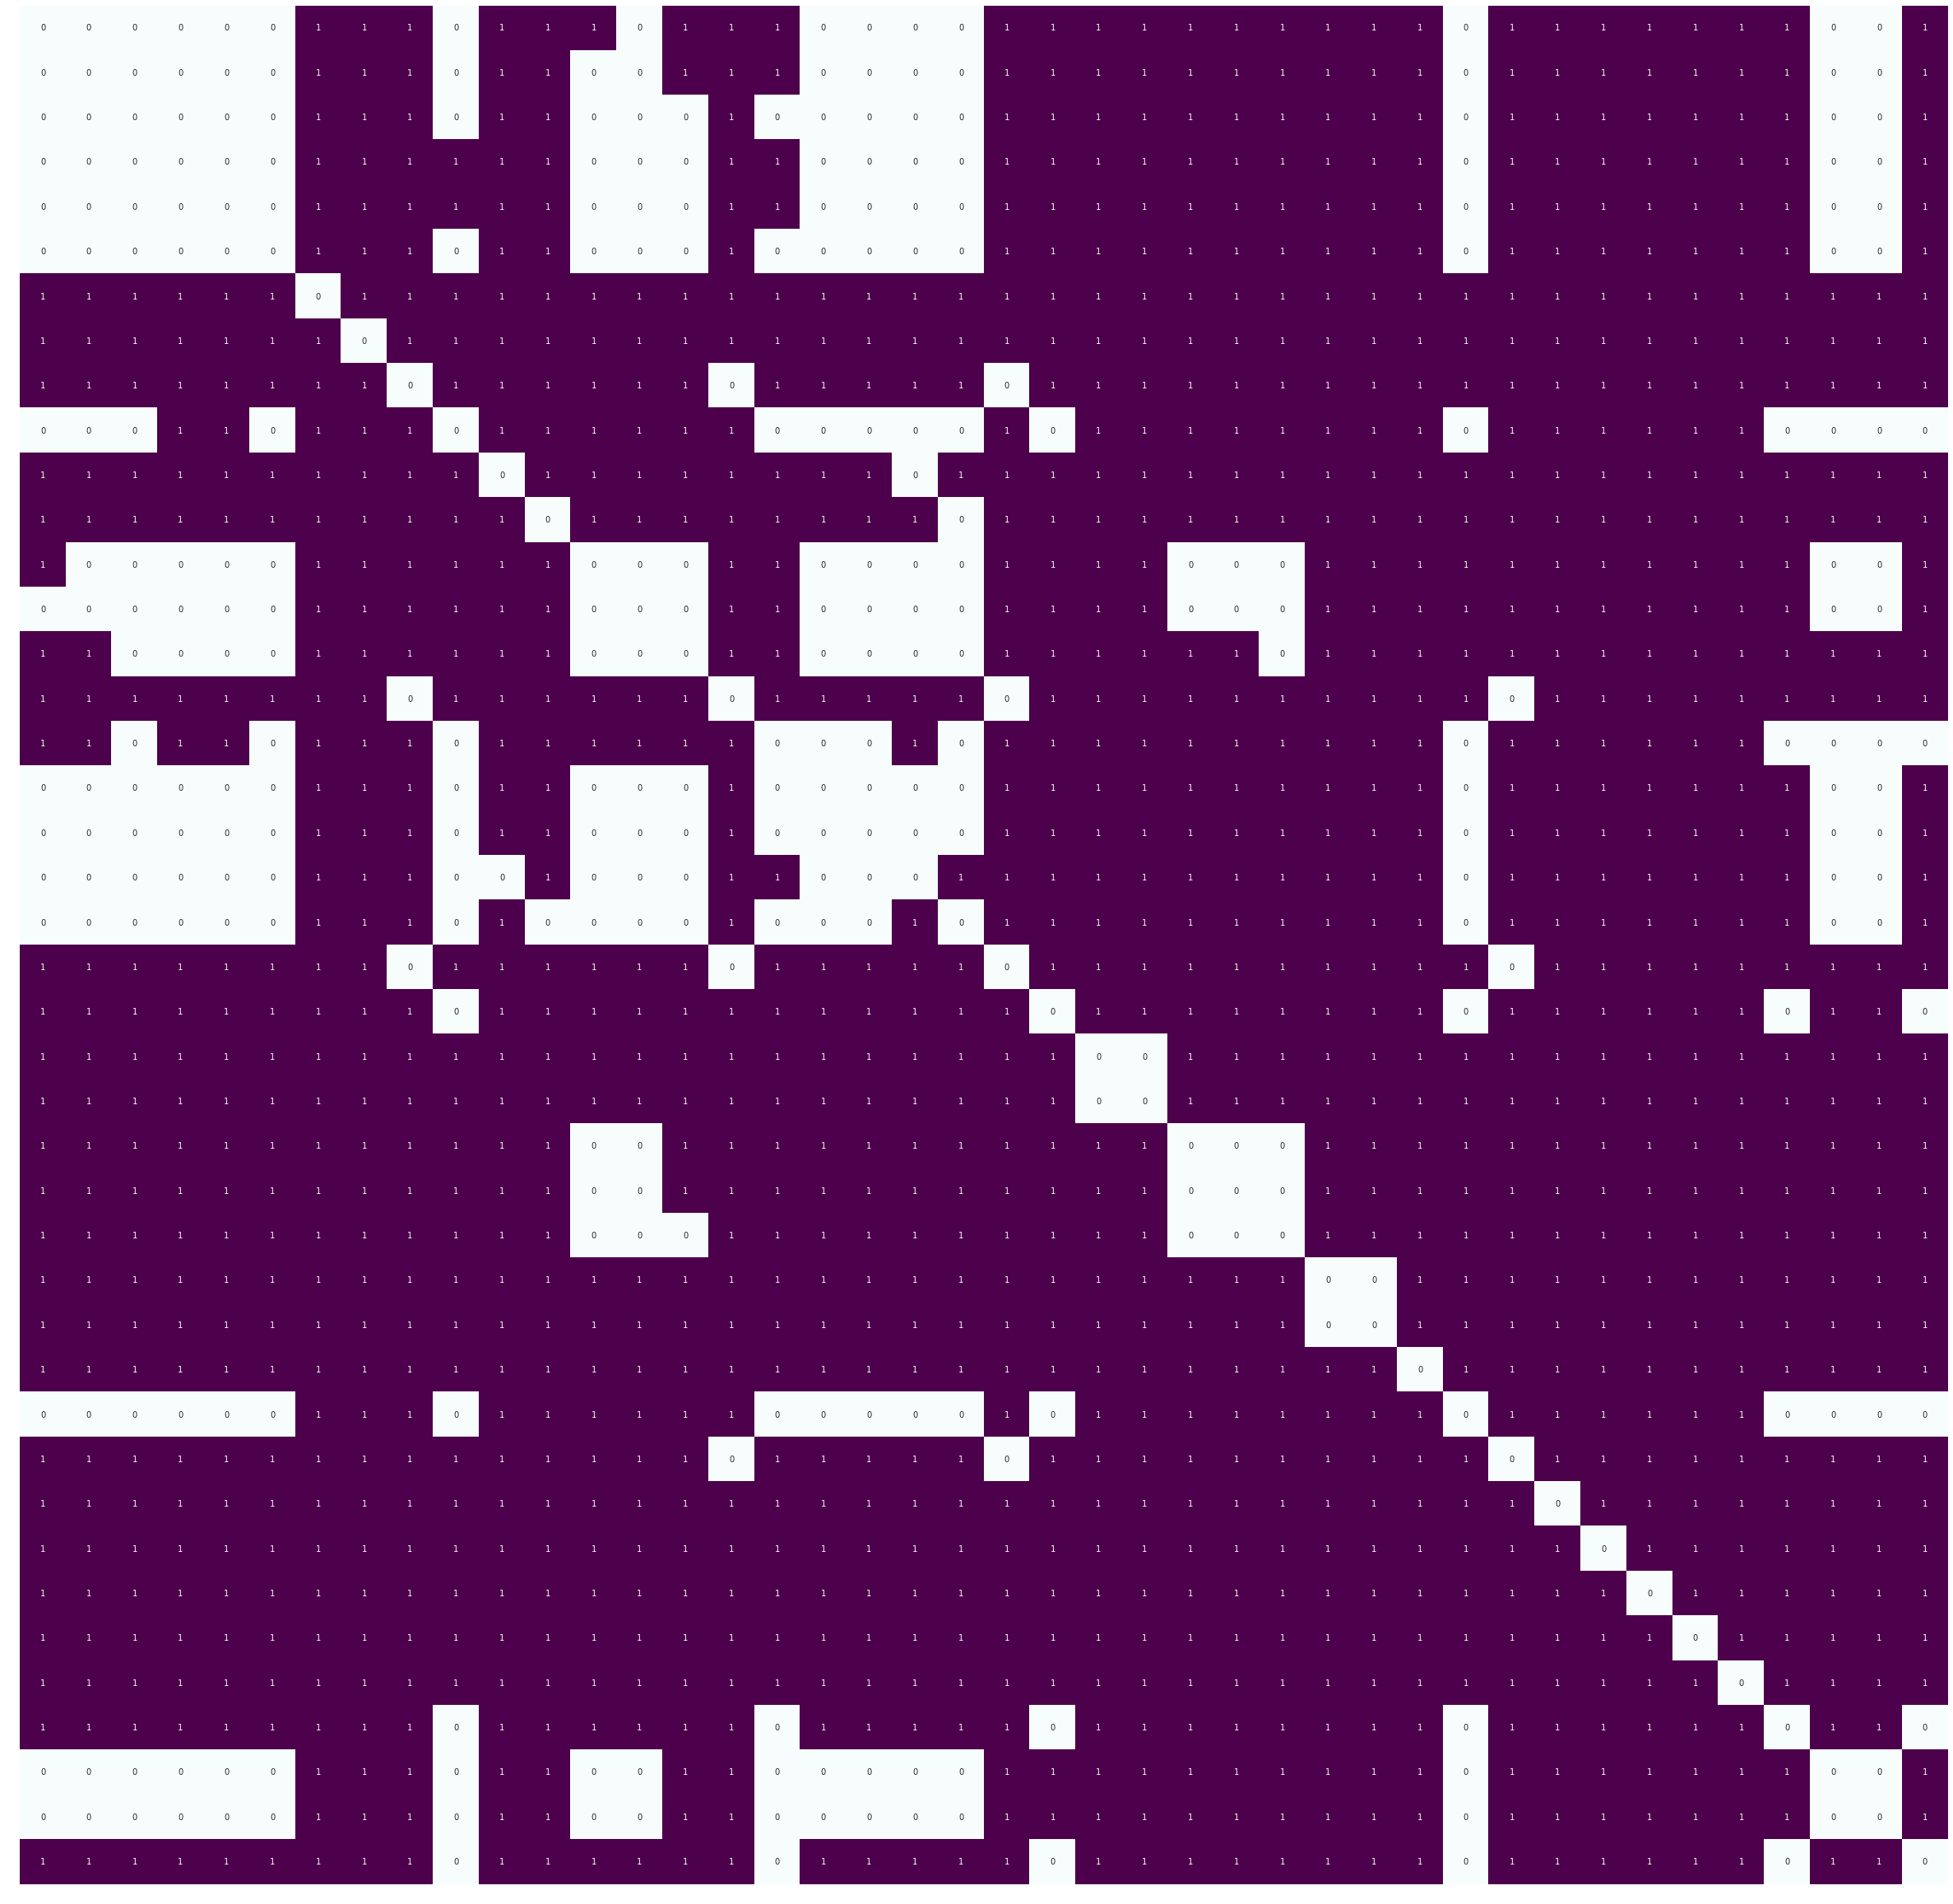

In [45]:
import seaborn as sns
fig = plt.figure(figsize=(42, 42))
ax=plt.gca()
sns.heatmap(A.astype(int),annot=True, fmt="d", cbar=False,cmap="BuPu")
ax.set_axis_off()
plt.show()

In [46]:
nx.degree(T)

DegreeView({0: 27, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 14, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1})

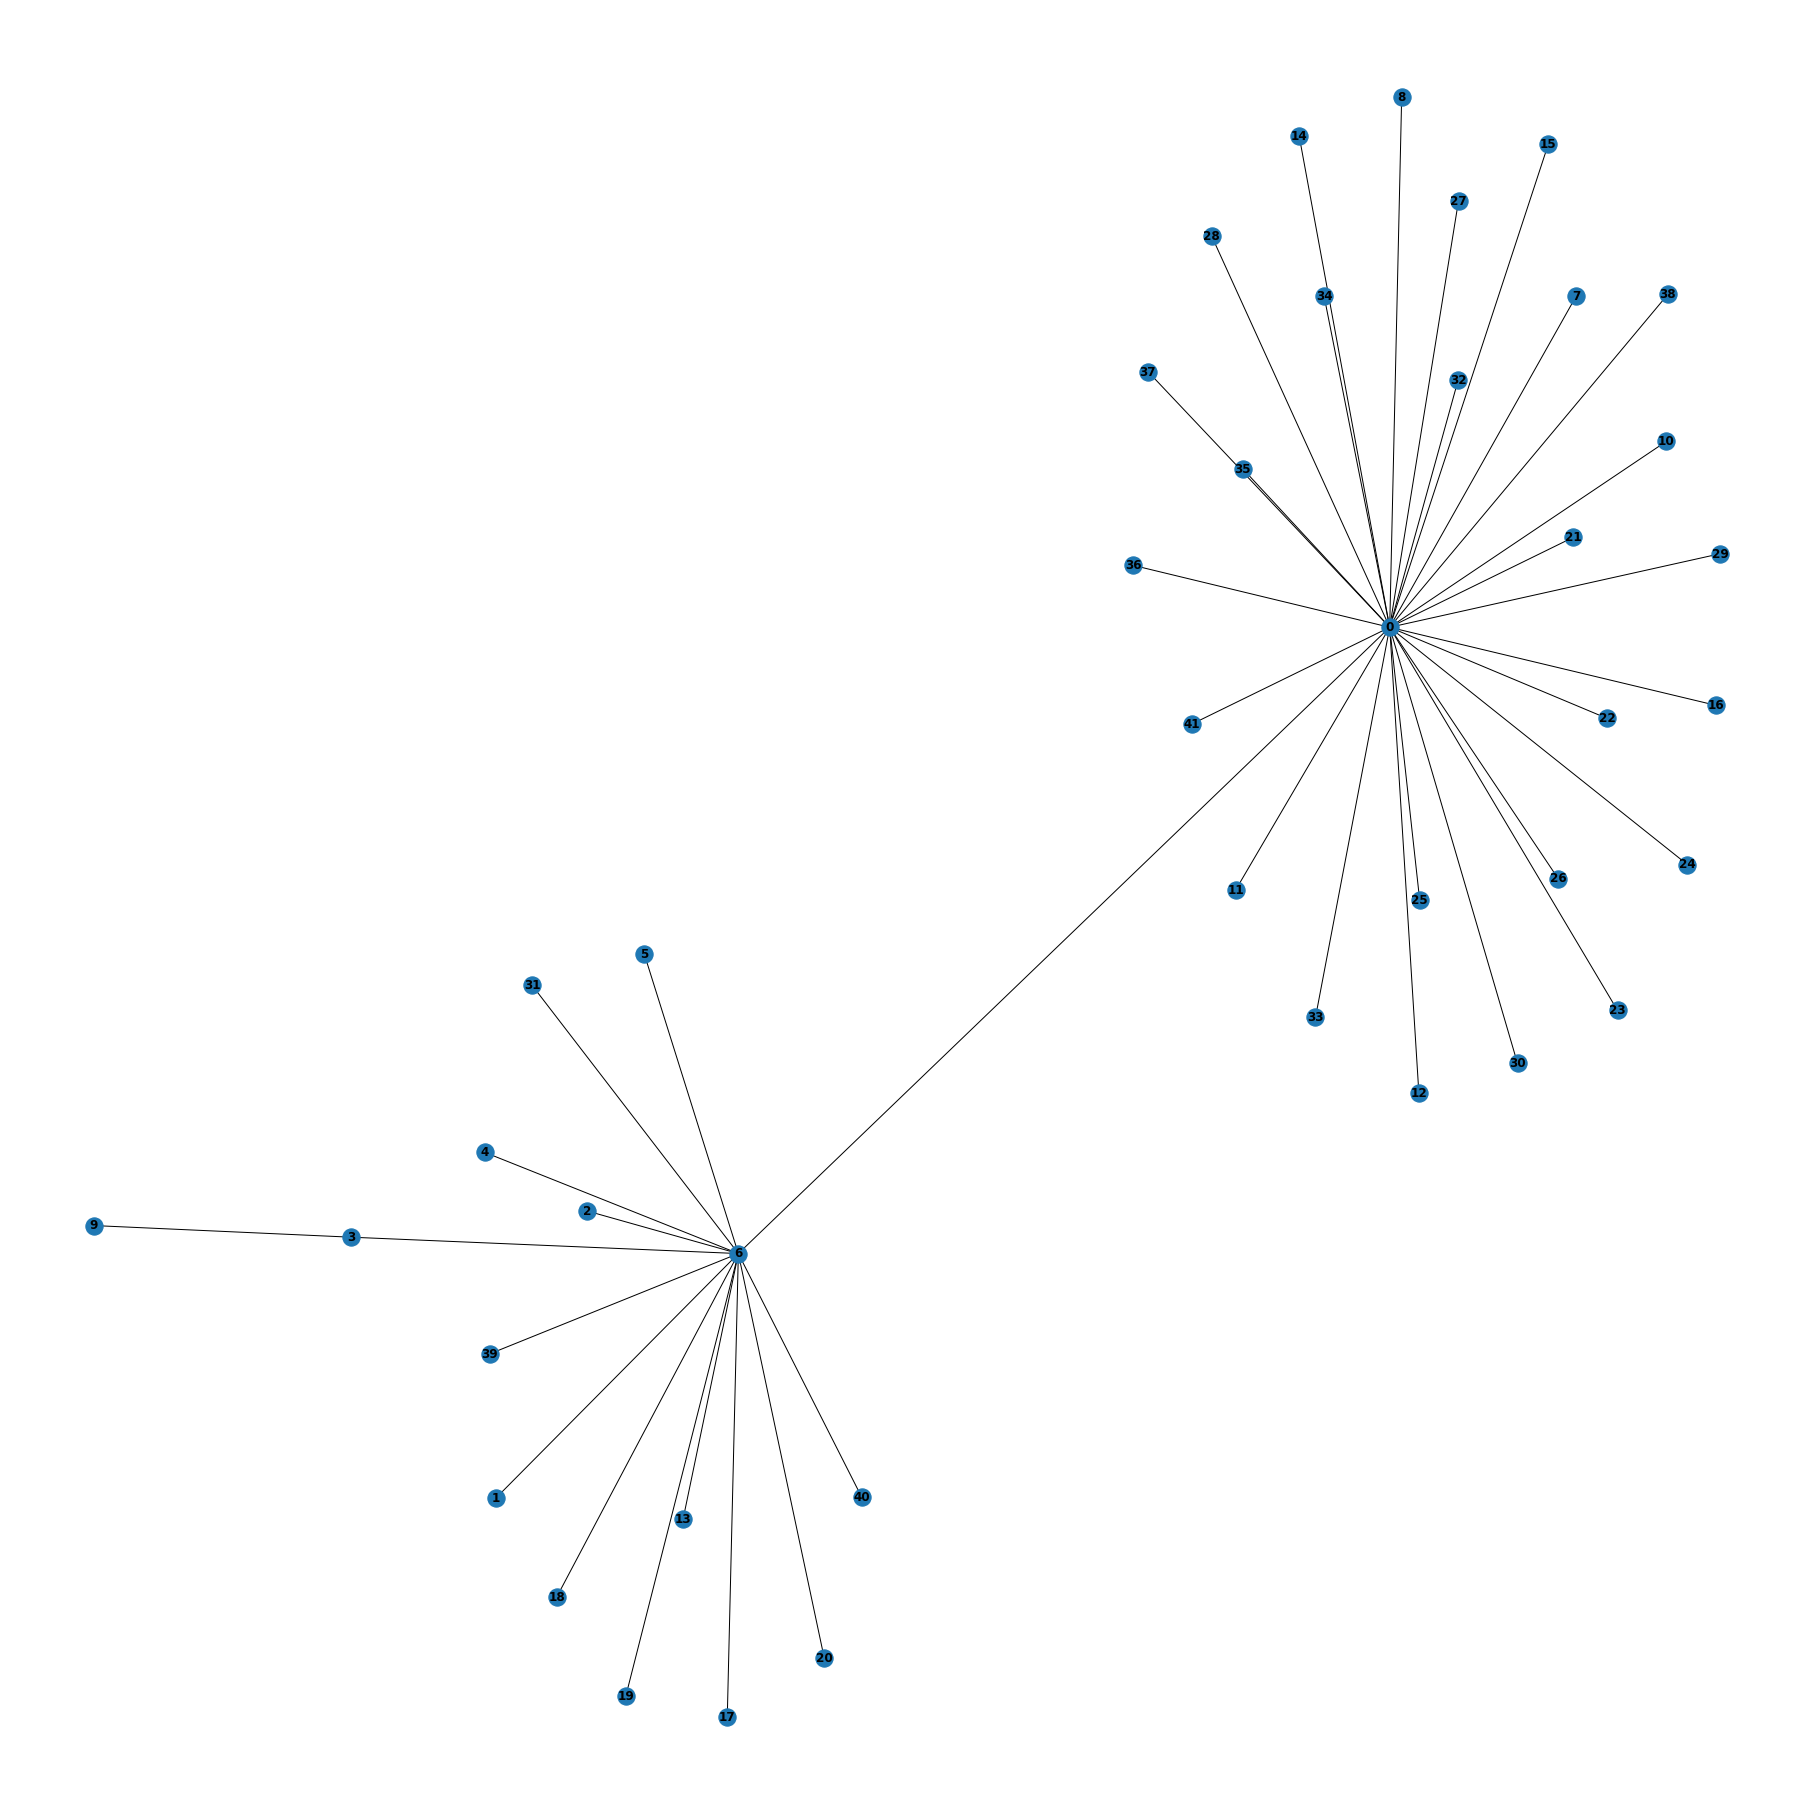

In [47]:
plt.figure(figsize=(25, 25))
nx.draw(T, with_labels=True, font_weight='bold')

In [48]:
nx.algorithms.cycles.find_cycle(T)

NetworkXNoCycle: No cycle found.

In [49]:
D = np.zeros((A.shape[0], A.shape[1]))

In [50]:
for node, degree in T.degree():
    D[node][node] = degree

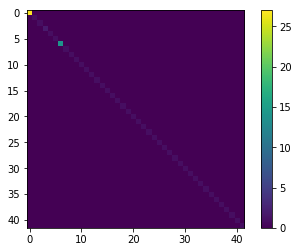

In [51]:
plt.imshow(D)
plt.colorbar()

In [52]:
L = nx.linalg.laplacian_matrix(T)

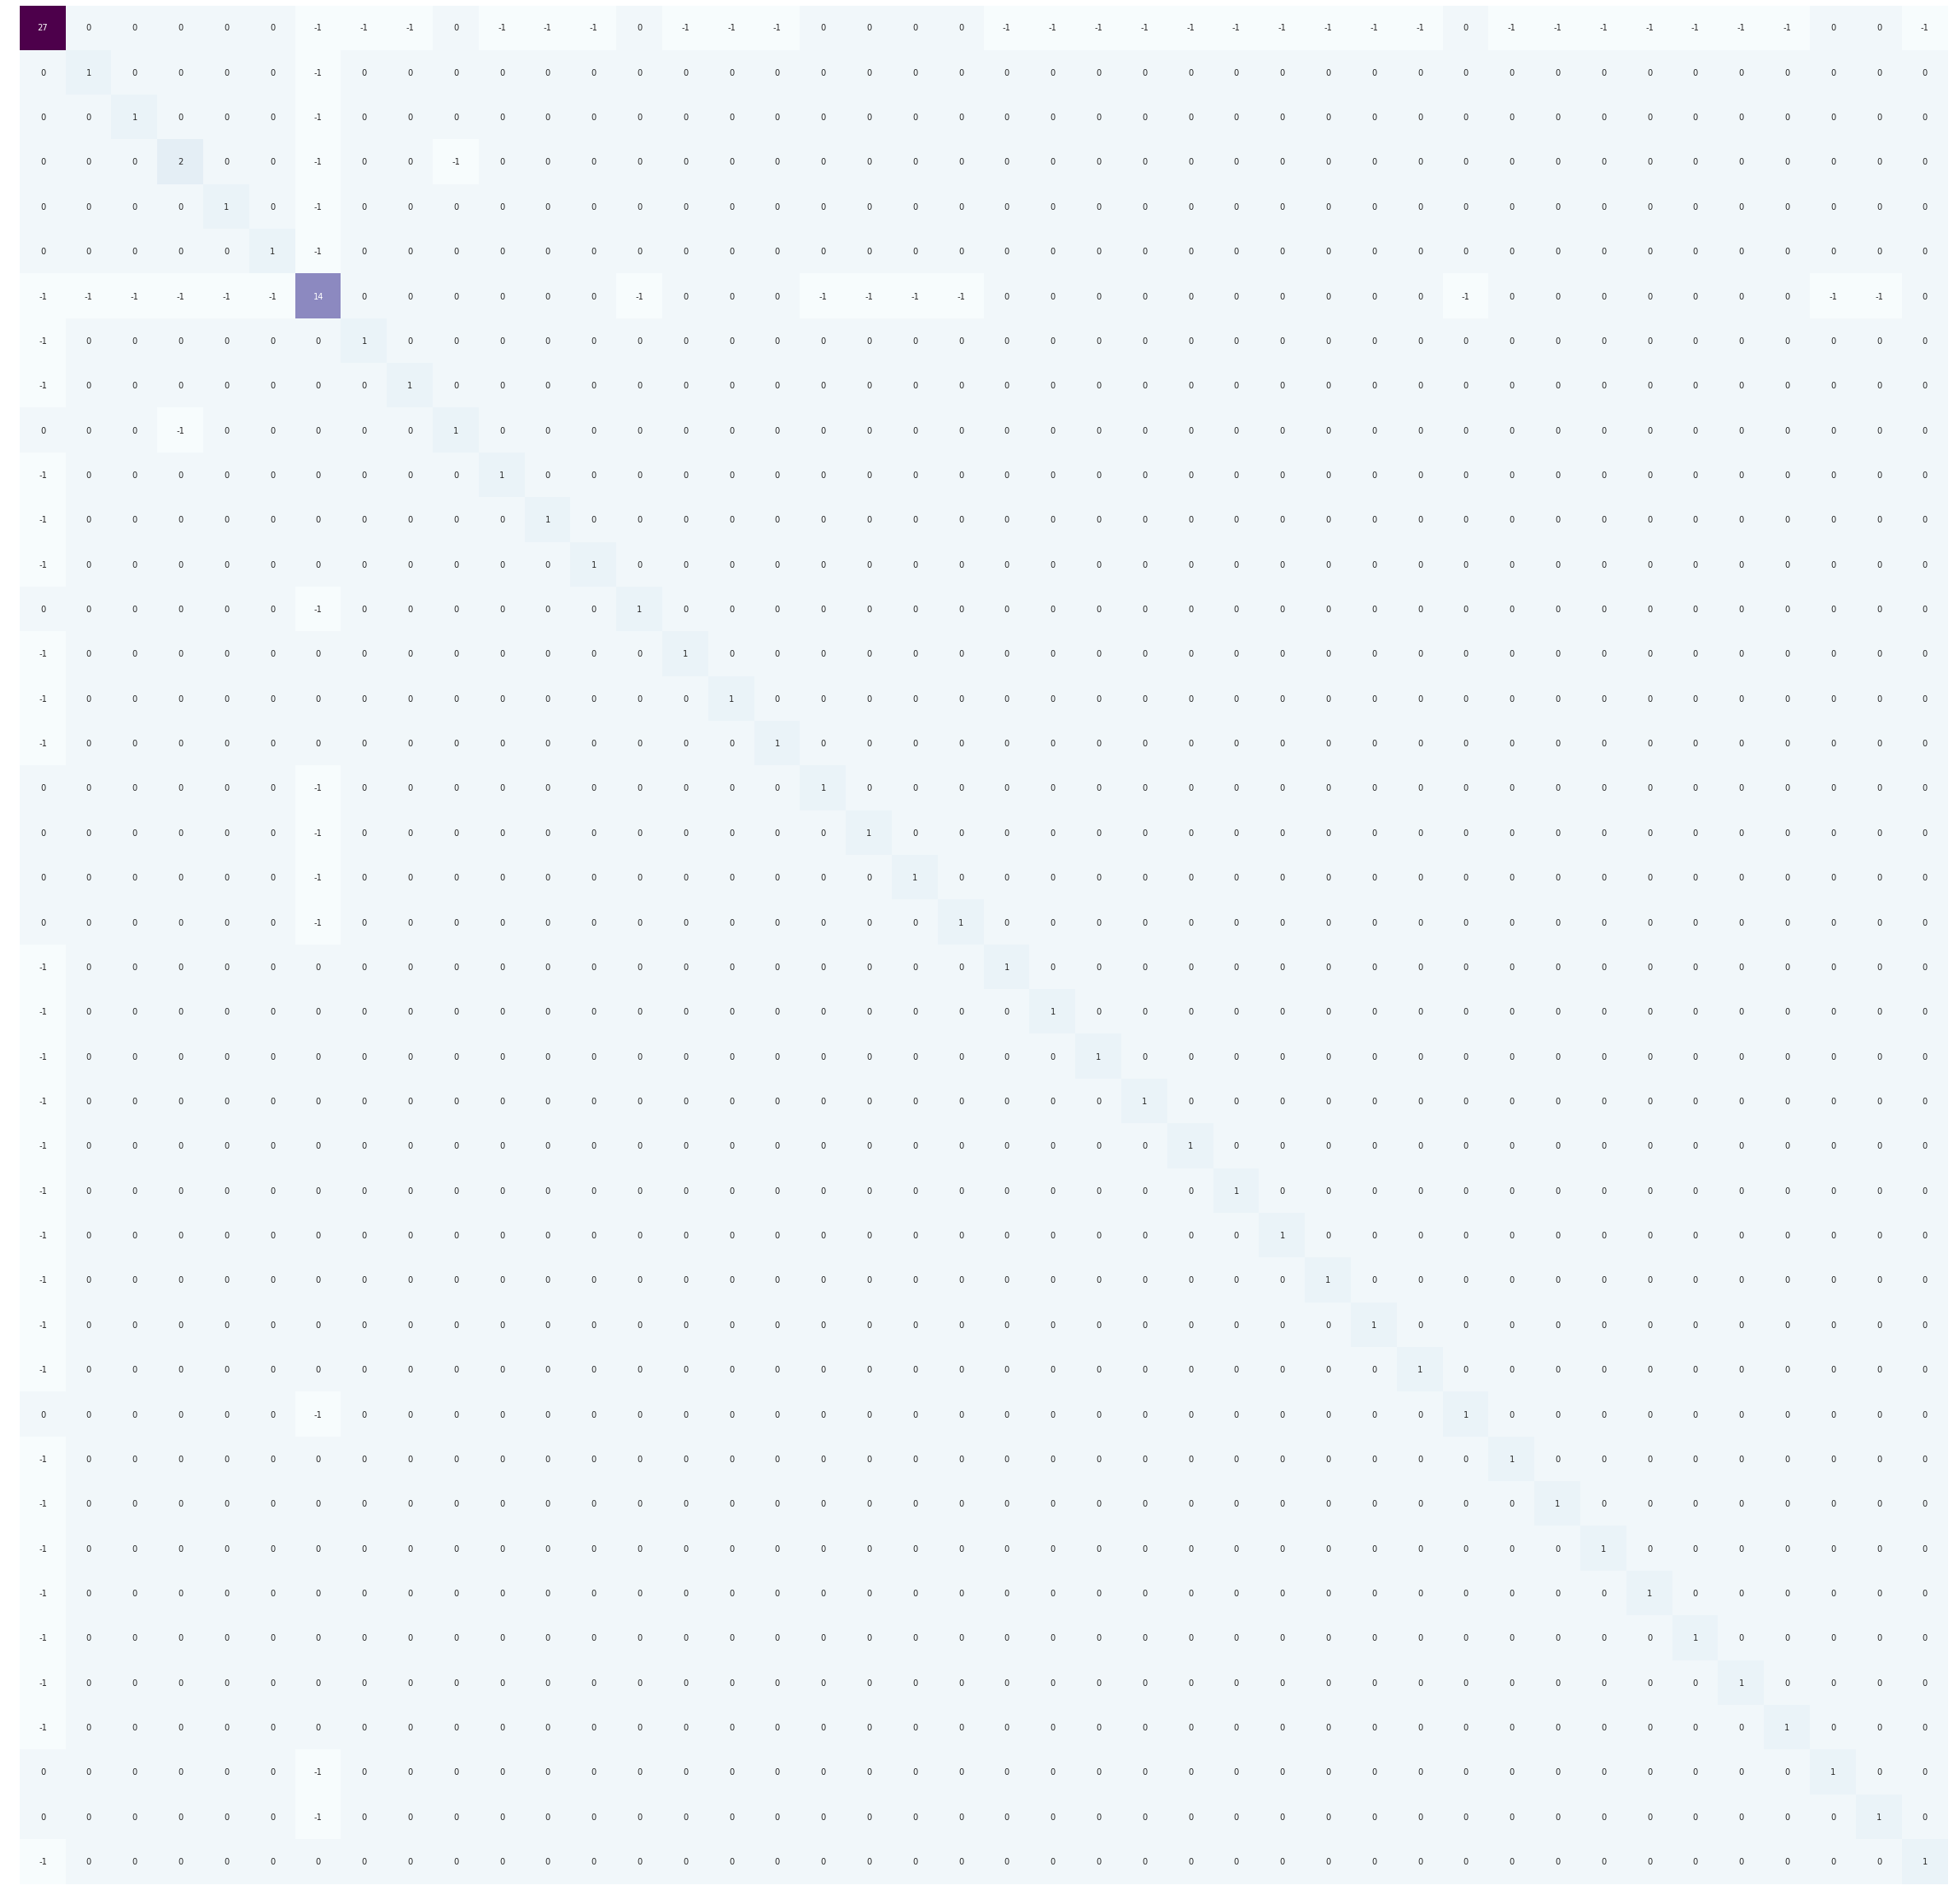

In [53]:
fig = plt.figure(figsize=(42,42))
ax=plt.gca()
sns.heatmap(L.toarray().astype(int),annot=True, fmt="d", cbar=False,cmap="BuPu")
ax.set_axis_off()
plt.show()

In [54]:
def eig_decompose_laplacian(L):
    eigvalues, eigvectors = np.linalg.eigh(L)
    idx = np.argsort(eigvalues)[::-1]
    sorted_eig = eigvalues[idx]
    sorted_eigv = eigvectors[idx]
    return (sorted_eig, sorted_eigv)

In [55]:
# L is a sparse compressed matrix
# Convert to dense before eigendecomposition
eigvalues, eigvectors = eig_decompose_laplacian(L.todense().astype(int))
np.diag(np.dot(eigvectors, eigvectors.T))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
X = np.array(df).transpose()

### The input_signal, $\matrix{X}$ is a graph signal
### $\matrix{X}$ $\in$ $\mathcal{R}^{NxF}$, 
### where $N$ is number of nodes and $F$ is the number of features

In [57]:
X.shape

(42, 106)

### Compute the graph Fourier Transform
### $\matrix{X}_{GFT}$ $=$ $\matrix{V}^{H}{X}$

### The column $i$, $\matrix{X}_{i}$ represents the graph signal for the $i^{th}$ patient

In [58]:
def compute_graph_fourier_transform(V, input_graph_signal):
    assert(X.shape[0] == V.shape[0])
    X_gft = np.dot(V.transpose(), input_graph_signal)
    return X_gft

In [59]:
X_gft = compute_graph_fourier_transform(eigvectors, X)

In [63]:
from pygsp import graphs, plotting, filters

In [64]:
G_pygsp = graphs.Graph(A_adj)

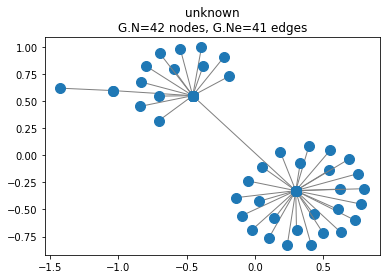

In [65]:
G_pygsp.set_coordinates()
plotting.plot_graph(G_pygsp)

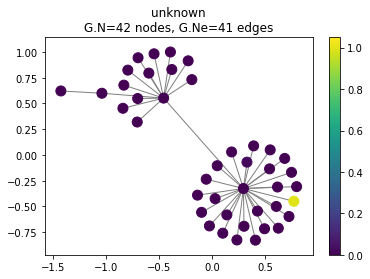

In [66]:
plotting.plot_signal(G_pygsp, signal=s)

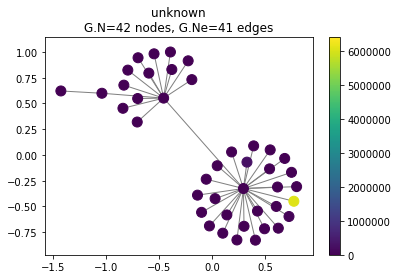

In [68]:
plotting.plot_signal(G_pygsp, signal=X[:,105])